# Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.
Here is the code to load the data:

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [13]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:

print(boston.feature_names)
print(boston.keys())

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [15]:
bos.columns = boston.feature_names

In [16]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

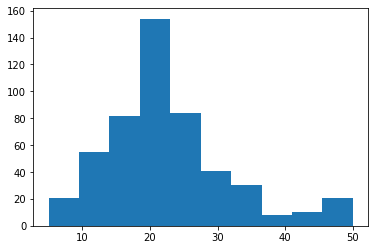

In [18]:
plt.hist(boston.target)

In [19]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

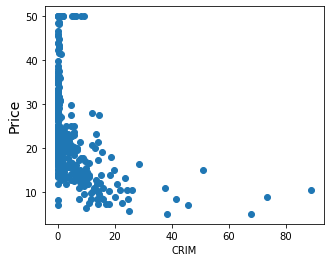

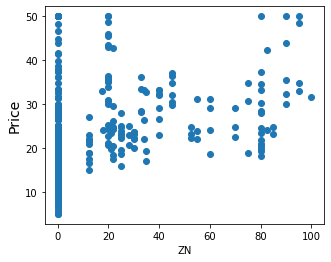

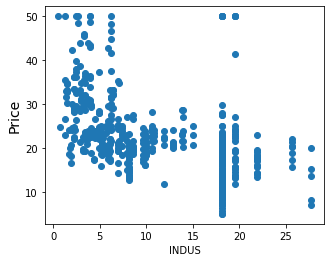

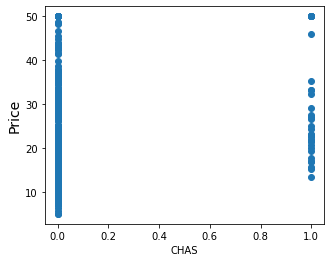

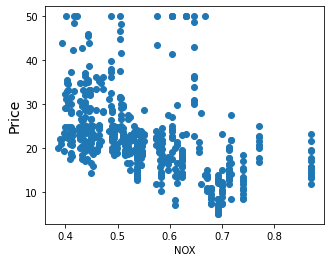

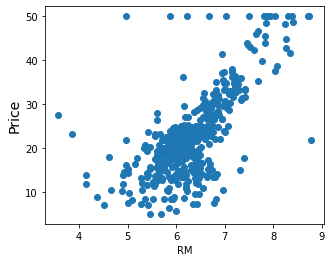

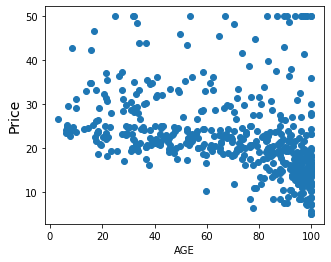

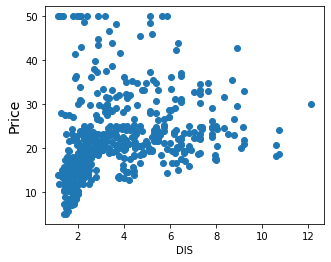

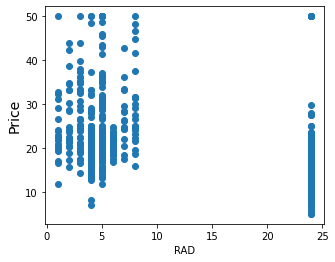

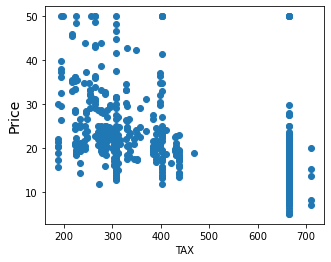

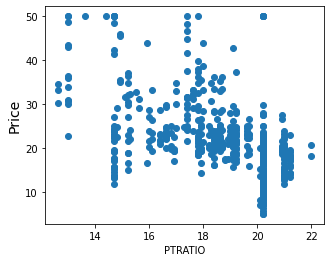

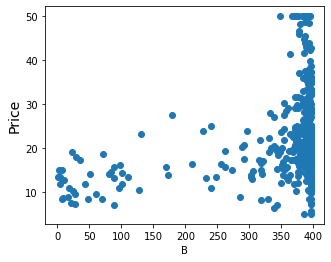

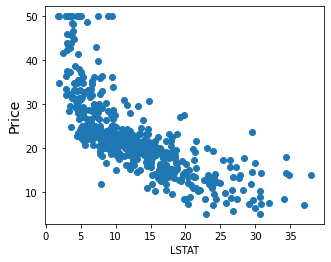

In [20]:
for index, feature in enumerate(boston.feature_names):
    plt.figure(figsize = (5,4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.xlabel(feature)
    plt.ylabel('Price', size= 14)

In [24]:
X = boston.data
y = boston.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.4)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(303, 13)
(303,)
(203, 13)
(203,)


In [31]:
linear_reg_model = linear_model.LinearRegression()

In [32]:
linear_reg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print("Cofficients \n\n", linear_reg_model.coef_)

Cofficients 

 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]


In [38]:
print("Variance Score is  \n {:.2f}".format(linear_reg_model.score(X_test, y_test)))

Variance Score is  
 0.72


In [56]:
X_predict = X_test.reshape(1, -1)
X_predict

array([[4.9320e-02, 3.3000e+01, 2.1800e+00, ..., 1.8600e+01, 3.8581e+02,
        9.3800e+00]])

In [57]:
X_test[len(X_test) - 1]

array([1.4052e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01,
       6.3750e+00, 3.2300e+01, 3.9454e+00, 4.0000e+00, 2.7700e+02,
       1.8600e+01, 3.8581e+02, 9.3800e+00])

In [63]:
X_test[0]

array([4.9320e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
       6.8490e+00, 7.0300e+01, 3.1827e+00, 7.0000e+00, 2.2200e+02,
       1.8400e+01, 3.9690e+02, 7.5300e+00])

In [64]:
print("Predict ", linear_reg_model.predict([X_test[0]]))

Predict  [32.5767836]


In [65]:
print("Predict ", linear_reg_model.predict(X_test))

Predict  [32.5767836  28.31584043 18.02490895 21.22723902 18.30706301 20.41855673
 33.00388637 18.23492365 24.15996405 26.44388935 26.89587445 29.11404673
 20.47403529 26.72290735 23.00917779 20.06036007 17.93614868 38.60918158
 30.21848598  8.72510853 20.4218793  15.62926355 25.14572116 24.8208665
 31.33254683 10.32111619 13.97300109 16.59941009 36.11111224 14.50980925
 21.75924461 14.18085506 43.80568262 18.29067878 21.0769219  20.36535011
 17.77192542 27.41157074  8.78516292 19.77211274 23.57601701 21.48478378
 29.01124151 16.29101185 19.34443514 14.72102079 39.10168604 18.15651807
 24.90906159 19.6083671  25.34392074 24.35100549 24.85160986 25.8996609
  4.61421883 24.39859206 11.27077844 26.40774218 17.10969386 36.0904063
 19.67664968 27.23937264 16.53365016 18.15907977 11.30355765 31.98198816
 36.95839215 21.45909144 24.13250983 24.41496302 23.46245892  6.98544199
 15.69004286 20.90901803 20.65100918 21.09179956 33.62584873 27.8598505
 25.06231279 35.46695443 19.31464639 23.276400